# Complete Guide to Exploratory Data Analysis (EDA) for TimeSeries


## Topics

###  1. Autocorrelation and Partial Autocorrelation (Whiteness)
###  2. Stationarity 
###  3. Seasonality

In [15]:
import pandas as pd
import numpy as np

# Plotting parameters
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,6)
from IPython.display import display

# Statsmodels
import statsmodels as sm 
import statsmodels.tsa.api as sm_tsa

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Autocorrelation and Partial Autocorrelation 

* Autocorrelation: Strength of the Correlation between a signal and its lagged values (past values)
* Partial Autocorrelation: The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

Sometimes referred to as autocorrelation function (ACF) and partial autocorrelation function (PACF). 


Notice that the autocorrelation for the AR(1) process shows correlations that persist across different lags. E.g. If $y_t$ is correlated to $y_{t-1}$, then $y_{t-1}$ is correlated with $y_{t-2}$, which makes $y_{t}$ correlated with $y_{t-2}$, and so-forth. The partial autocorrelation negates this problem by removing the correlations from all the shorter lags. This makes the PACF useful to identify the model order of an AR process.  

#### Reference: 
* [Machine Learning Mastery](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)
* [Time Series Basics](http://dacatay.com/data-science/part-1-time-series-basics-python/)

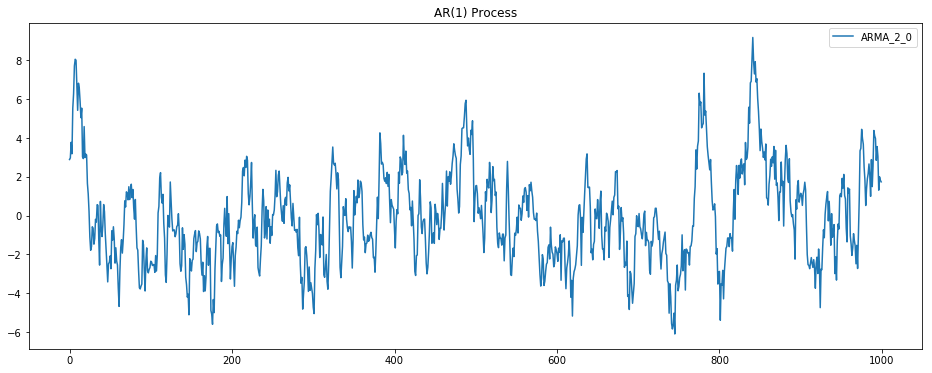

In [8]:
# Generate an AR(p) process
ar_params = [1, -0.9]
ma_params = [1]
y = pd.DataFrame(sm_tsa.arma_generate_sample(ar=ar_params, ma=ma_params, nsample=1000), columns=['ARMA_2_0'])

# Plot Signal (Time-Series)
y.plot(title='AR(1) Process')
plt.show()

In [9]:
# Estimate Parametes
model = sm_tsa.ARMA(y.values, (2, 0)).fit(trend='nc', disp=0)
model.params

array([ 0.84647641,  0.07008002])

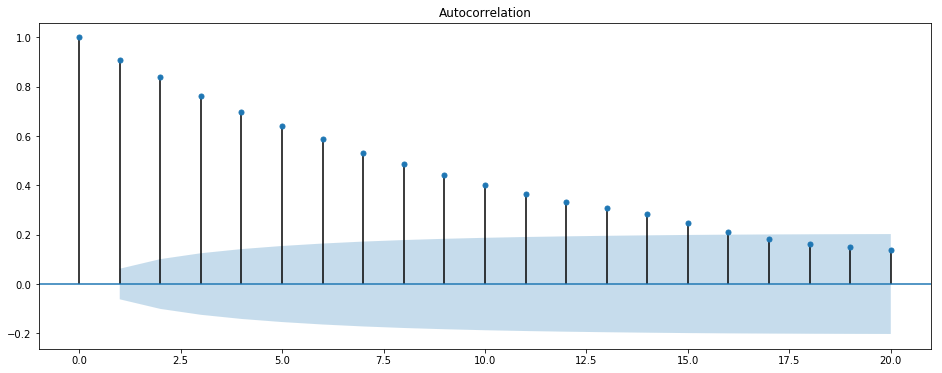

In [10]:
# ACF 
plot_acf(y, lags=20)

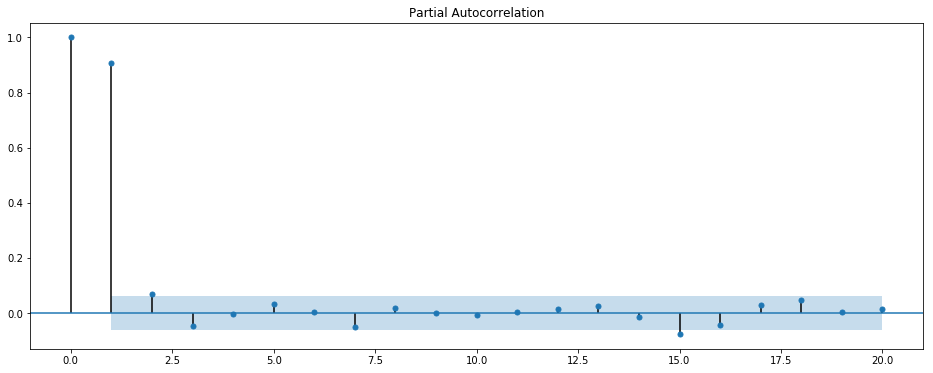

In [11]:
# PACF
plot_pacf(y, lags=20)

## Decomposition (Seasonality)
